<a href="https://colab.research.google.com/github/CitiVision/StreetView/blob/main/Chennai_DownloadStreetViewByCoordinates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install piexif
!pip install streetview
!pip install geopandas
!pip install osmnx
!pip install pandas
!pip install numpy
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 2.1 MB/s eta 0:00:00


In [21]:
!pip install Pillow

In [6]:
import streetview
from streetview import search_panoramas, get_streetview, get_panorama
import os
import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#@markdown # Connect to google Drive

#@markdown **Run this cell**

#@markdown ---

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Main Function

In [29]:
from streetview import get_panorama
from PIL import Image
import os
import numpy as np
import piexif

def get_streetview(lon, lat, retrieve='all'):
    try:
        def get_key(my_dict, val):
            for key, value in my_dict.items():
                if val == value:
                    return key
            return "key doesn't exist"

        panos = search_panoramas(lat=lat, lon=lon)

        if len(panos)>0:
            dates = {pan.pano_id:pan.date for pan in panos}
            if retrieve=='all':
                return dates
            elif retrieve=='last':
                dates = {pan.pano_id:pan.date for pan in panos}
                for key, date in dates.items():
                    if type(date) == str:
                        dates[key] = (int(f'{date[:4]}{date[5:7]}'))
                    else:
                        dates[key] = 0

                return get_key(dates,max(dates.values())), max(dates.values())
    except Exception as e:
        print(coords,e)
        pass


def download_panorama(pan_id, exp_path=None):
    if exp_path != None:
        file_path = os.path.join(exp_path)
    else:
        file_path = f"{pan_id}.jpeg"
    if not os.path.exists(file_path):
        try:
            image = get_panorama(pano_id=pan_id)
            image.save(file_path)

            # Check for black bands
            if has_black_bands(image):
                # Scale the image by 1.2x
                image = scale_image(image, 1.3)
                # Save the adjusted image
                image.save(file_path)

            print(f"Image saved at {file_path}")
            return file_path
        except Exception as e:
            print(pan_id, e)

def has_black_bands(image):
    # Convert image to numpy array
    img_array = np.array(image)

    # Check the right edge (last column) and bottom edge (last row)
    right_edge = img_array[:, -1, :3]  # Get the RGB values of the right edge
    bottom_edge = img_array[-1, :, :3]  # Get the RGB values of the bottom edge

    # Define a threshold for black (you may need to adjust this)
    black_threshold = 10  # RGB values below this are considered black

    # Check if the right edge and bottom edge are mostly black
    is_right_black = np.all(right_edge < black_threshold, axis=1).mean() > 0.9  # 90% of pixels are black
    is_bottom_black = np.all(bottom_edge < black_threshold, axis=0).mean() > 0.9  # 90% of pixels are black

    return is_right_black or is_bottom_black

def scale_image(image, scale_factor):
    # Calculate new size
    new_size = (int(image.width * scale_factor), int(image.height * scale_factor))

    # Resize the image
    scaled_image = image.resize(new_size, Image.LANCZOS)

    # Crop the image to the original size, anchored at the top-left corner
    cropped_image = scaled_image.crop((0, 0, image.width, image.height))

    return cropped_image



# 1. Retrieve panorama ids

### Option A. Get a list of panoramas available at a given location (longitude and latitude)

In [9]:
get_streetview(lon=80.2475661, lat=13.0603153)

{'36SOUNNH2B1gckyHkorHmA': None,
 'ZV7QLyj3W6RdbpBsWXDF3Q': None,
 'Cuj3TIlbaAedCBfUdr_kaA': None,
 'MVeCjn1tGxSvGfd4aayKlA': None,
 'O681baX0K7lKWMMXYTMXhQ': None,
 'LpfFt3XZaZT-ytqbB99ZRg': None,
 'dwJL-7uS7cTZFEcTJE-9Og': None,
 'NmH4BHo-Fp0Fj_9JDAlcBA': None,
 'ZXxN8EooseqTWzsDz79z5w': None,
 'LJNfI2hZJsXnZRypD03A8A': None,
 '-_N-PYoEAHKkjiSijNSshg': None,
 'S_V0gXFqmuVnRQTjcFqwXQ': None,
 '9PM0Sww_SL8696CITOcCog': None,
 'Eh8_HrXZBuVUdL-c-Wp4_g': None,
 'xRkpTVWen1ZqGypGD4E3cg': None,
 'ORdD2_wKfRMYab7Ex4dtjg': None,
 'UXM8xQeOl6YzDPaYQEBDiA': None,
 'XcLSQi3l-AwWcCXzugAhFg': None,
 'cA9xDUaz9eqhNUW8nCGhXQ': None,
 'GWfi7fxU4LoshmboTXTQeA': None,
 'gUO6zeCBklu1FuLKbN9h0Q': None,
 'Mx96IhP_eXtV96jeDTOA3w': None}

### Option B. Get most recent panorama

In [10]:
get_streetview(lon=80.2475661, lat=13.0603153, retrieve='last')

('36SOUNNH2B1gckyHkorHmA', 0)

# 2. Download to file

### Option A. Download panorama to same folder than notebook

In [13]:
download_panorama('jTzFlgP1zMZZ2kLDcfnh6w')

'jTzFlgP1zMZZ2kLDcfnh6w.jpeg'

### Option B. Download to a given folder

In [12]:
download_panorama('FWgyMTHaTz5fL28bYLC2hg', exp_path='/content/drive/My Drive/Chennai_DataExtraction/StreetviewImages_Teynampet4000/{index}_{pan_id}.jpeg')

'/content/drive/My Drive/Chennai_DataExtraction/StreetviewImages_Teynampet4000/{index}_{pan_id}.jpeg'

# Converting RoadNetwork to WGS84 aka EPSG4326
## Making sure that the Centroid Geometry is in (Logitude,Latitude) Points

EPSG:7785


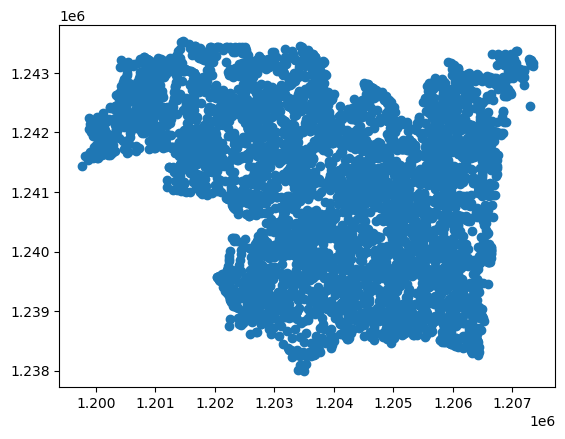

In [13]:
isovist_streets = gpd.read_file('/content/drive/My Drive/Chennai_DataExtraction/Shapefiles&GeoPackages/TeynampetRoad_Centroids_Isovists/Teynampet_RoadNetworks_NodesJunction_Isovist_Centroids.shp')
isovist_streets.plot()
print (isovist_streets.crs)


In [14]:
# Convert the crs to EPSG:4326
isovist_streets = isovist_streets.to_crs(epsg=4326)
print (isovist_streets.crs)


EPSG:4326


In [15]:
isovist_streets.head()

,id,@id,abandoned,access,addr_city,addr_count,addr_distr,addr_house,addr_postc,addr_state,...,website,wheelchair,width,wikidata,wikipedia,u,v,length,isovist_ar,geometry
0,way/4719038,way/4719038,None,None,None,None,None,None,None,None,...,None,None,None,None,None,0,1,60.121185,8191.315927,POINT (80.25746 13.0387)
1,way/4719045,way/4719045,None,None,None,None,None,None,None,None,...,None,None,None,None,None,1,2,118.227497,8302.132964,POINT (80.25647 13.039)
2,way/4719048,way/4719048,None,None,None,None,None,None,None,None,...,None,None,None,None,None,2,3,155.617932,8334.468916,POINT (80.25171 13.03946)
3,way/4719050,way/4719050,None,None,None,None,None,None,None,None,...,None,None,None,None,None,3,4,154.933060,9714.513661,POINT (80.25115 13.04014)
4,way/4719051,way/4719051,None,None,None,None,None,None,None,None,...,None,None,None,None,None,4,5,345.634579,11939.402372,POINT (80.25354 13.04144)


In [16]:
# create a new gdf with only the first 5 rows
isovist_streets_sample = isovist_streets.head(5)
isovist_streets_sample

,id,@id,abandoned,access,addr_city,addr_count,addr_distr,addr_house,addr_postc,addr_state,...,website,wheelchair,width,wikidata,wikipedia,u,v,length,isovist_ar,geometry
0,way/4719038,way/4719038,None,None,None,None,None,None,None,None,...,None,None,None,None,None,0,1,60.121185,8191.315927,POINT (80.25746 13.0387)
1,way/4719045,way/4719045,None,None,None,None,None,None,None,None,...,None,None,None,None,None,1,2,118.227497,8302.132964,POINT (80.25647 13.039)
2,way/4719048,way/4719048,None,None,None,None,None,None,None,None,...,None,None,None,None,None,2,3,155.617932,8334.468916,POINT (80.25171 13.03946)
3,way/4719050,way/4719050,None,None,None,None,None,None,None,None,...,None,None,None,None,None,3,4,154.933060,9714.513661,POINT (80.25115 13.04014)
4,way/4719051,way/4719051,None,None,None,None,None,None,None,None,...,None,None,None,None,None,4,5,345.634579,11939.402372,POINT (80.25354 13.04144)


In [30]:
# create a for loop to iterate through all rows in the geodataframe and get the streetview images
# The saved file path name will have the Index of the row and the panorama ID
# create a condition that if there is an error it skips and moves to the next row

for index, row in isovist_streets_sample.iterrows():
    lon = row['geometry'].x
    lat = row['geometry'].y
    try:
        pan_id, date = get_streetview(lon=lon, lat=lat, retrieve='last')
        if pan_id:
            download_panorama(pan_id, exp_path=f'/content/drive/My Drive/Chennai_DataExtraction/StreetviewImages_Teynampet4000/{index}_{pan_id}.jpeg')

        else:
            print('No panorama found for', lon, lat)
    except Exception as e:
        print(f'Error processing row {index}: {e}')

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (134217728 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Image saved at /content/drive/My Drive/Chennai_DataExtraction/StreetviewImages_Teynampet4000/0_R0M0RM6MoPhmWFSOsCBZ1w.jpeg
Image saved at /content/drive/My Drive/Chennai_DataExtraction/StreetviewImages_Teynampet4000/1_gP0HmBRcYPGwgMu71kwCgQ.jpeg
Image saved at /content/drive/My Drive/Chennai_DataExtraction/StreetviewImages_Teynampet4000/2_a_s1qPZ7Lj45HGM9ZDR0_w.jpeg
Image saved at /content/drive/My Drive/Chennai_DataExtraction/StreetviewImages_Teynampet4000/3_oXxXMZOaJSHEBnVl1IGsqg.jpeg
Image saved at /content/drive/My Drive/Chennai_DataExtraction/StreetviewImages_Teynampet4000/4_hlPk80UJcAqRXfQclttWNA.jpeg
